In [25]:
import pandas as pd

# 假設你的 txt 檔案路徑如下：
file_path_1 = r'/home/yanxunzhou/TBrain_SmartPing/data/raw/39_Training_Dataset/train_data/991.txt'
file_path_2 = r'/home/yanxunzhou/TBrain_SmartPing/data/raw/39_Training_Dataset/train_data/999.txt'

# 讀取 txt，使用空白（可能為多個空格）作為分隔符
df_1 = pd.read_csv(file_path_1, delim_whitespace=True, header=None)
df_2 = pd.read_csv(file_path_2, delim_whitespace=True, header=None)

# 加上欄位名稱
df_1.columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
df_2.columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

# 檢查前幾筆資料
print(df_1.head())
print(df_2.head())


     ax   ay   az   gx    gy    gz
0     0    0    0    0     0     0
1 -1792  768 -627 -533  -405   703
2 -1823  724 -635 -661  -533   898
3 -1837  728 -635 -775  -867  1076
4 -1845  749 -628 -841 -1307  1197
     ax   ay    az    gx    gy     gz
0  -930 -504  1654  4823 -3567 -11897
1  -945 -631  1668  5694 -3316 -13053
2 -1036 -709  1710  6161 -3163 -13971
3 -1109 -762  1757  6670 -2992 -15524
4 -1142 -782  1793  6867 -2923 -16605


/tmp/ipykernel_64254/1875094038.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_1 = pd.read_csv(file_path_1, delim_whitespace=True, header=None)
/tmp/ipykernel_64254/1875094038.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_2 = pd.read_csv(file_path_2, delim_whitespace=True, header=None)


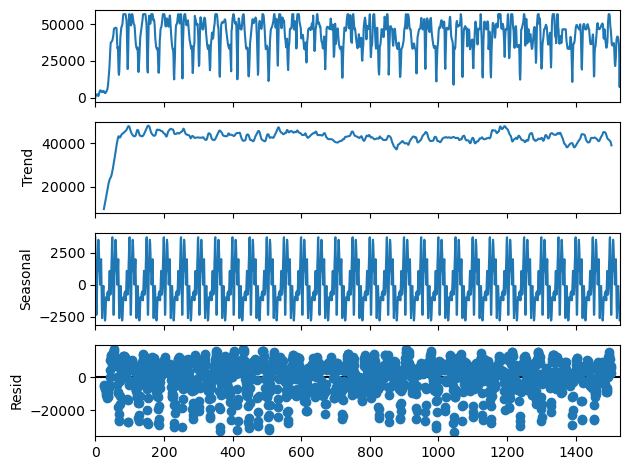

Residual Standard Deviation: 10235.69286407045


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np

# 選擇 g 資料並確保是 Series 格式
signal = df_1[['gx', 'gy', 'gz']].values
amp_signal = (signal[:, 0]**2 + signal[:, 1]**2 + signal[:, 2]**2) ** 0.5
amp_signal = np.array(amp_signal)
signal = pd.Series(amp_signal)

# 取中間2048點
if len(signal) < 1024:
    signal = np.pad(signal, (0, 2048 - len(signal)), mode='constant')
else:
    mid = len(signal) // 2
    start = max(0, mid - 1024)
    end = start + 2048
    signal = signal[start:end]

# 做時間序列分解（設定 period，假設每 50 筆資料為一個揮拍週期）
result = seasonal_decompose(signal, model='additive', period=50)
resid_std = result.resid.std()

# 畫出分解結果
result.plot()
plt.tight_layout()
plt.show()
print(f"Residual Standard Deviation: {resid_std}")



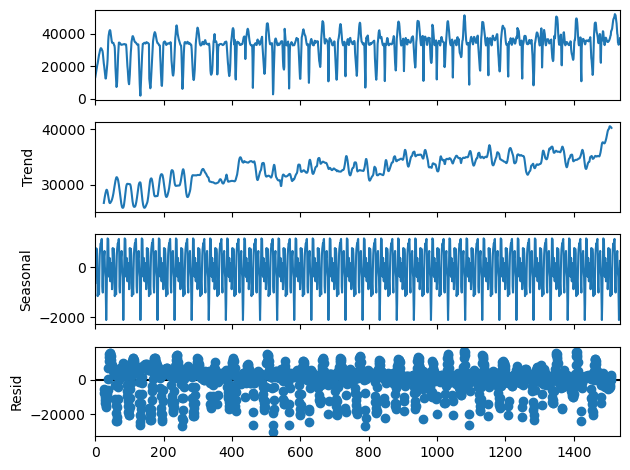

Residual Standard Deviation: 8140.898233542046


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np

# 選擇 g 資料並確保是 Series 格式
signal = df_2[['gx', 'gy', 'gz']].values
amp_signal = (signal[:, 0]**2 + signal[:, 1]**2 + signal[:, 2]**2) ** 0.5
amp_signal = np.array(amp_signal)
signal = pd.Series(amp_signal)

# 取中間2048點
if len(signal) < 1024:
    signal = np.pad(signal, (0, 2048 - len(signal)), mode='constant')
else:
    mid = len(signal) // 2
    start = max(0, mid - 1024)
    end = start + 2048
    signal = signal[start:end]

# 做時間序列分解（設定 period，假設每 50 筆資料為一個揮拍週期）
result = seasonal_decompose(signal, model='additive', period=50)
resid_std = result.resid.std()

# 畫出分解結果
result.plot()
plt.tight_layout()
plt.show()
print(f"Residual Standard Deviation: {resid_std}")
